In [1]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-5b5a82dc-bcc4-27be-798e-8c6b7b56c922)


In [2]:
#getting the data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-04-16 10:58:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-04-16 10:58:47 (7.50 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import datetime
import tensorflow as tf

In [4]:
#Reading the data
#passing date columns as dates and indexes
data = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=['Date'], index_col=['Date'])
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
#getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
print(len(data))

2787


In [7]:
#only getting closing price
bitcoin_prices = pd.DataFrame(data['Closing Price (USD)']).rename(columns = {"Closing Price (USD)":'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


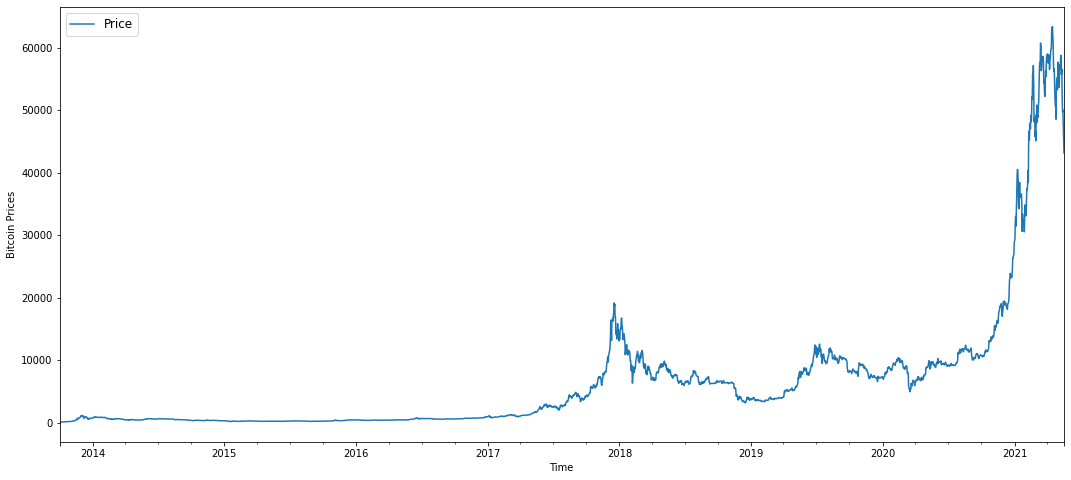

In [8]:
#plotting the time series data
bitcoin_prices.plot(figsize = (18,8))
plt.ylabel("Bitcoin Prices")
plt.xlabel("Time")
plt.legend(fontsize = 12);

2787 2787


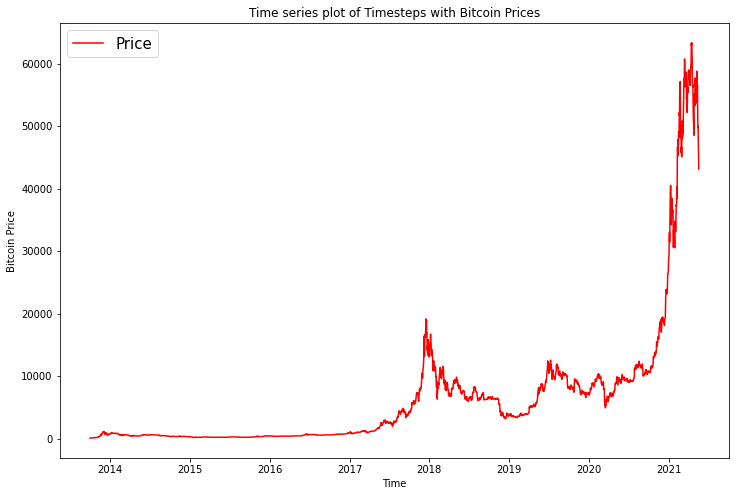

In [9]:
#without the pandas csv module
#by csv and datetime modules
timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader)#skipping the first line to get rid of the column titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

print(len(timesteps), len(btc_price))


plt.figure(figsize = (12,8))
plt.plot(timesteps, btc_price, c = "red", label = "Price")
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.title("Time series plot of Timesteps with Bitcoin Prices")
plt.legend(fontsize = 15)
plt.show();

### In time series problems, you'll either have univariate or multivariate data.


* Univariate time series data deals with one variable, for example, using the price of Bitcoin to predict the price of Bitcoin.
* Multivariate time series data deals with more than one variable, for example, predicting electricity demand using the day of week, time of year and number of houses in a region.
* Traditional method, train_test_split from scikit-learn cannot be used in here, since it chooses data scatterted randomly. It is not suitable for time series analysis.




### Data Split

In [10]:
#get bitcoin data as arrays
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()
timesteps[:10]

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
       '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
       '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
       '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [11]:
#create train and test splits the right way for data
split_size = int(0.8 * len(prices))# 80% trainig, 20% testing
#training data
x_train, y_train = timesteps[:split_size], prices[:split_size]
#testing data
x_test, y_test = timesteps[split_size:], prices[split_size:]

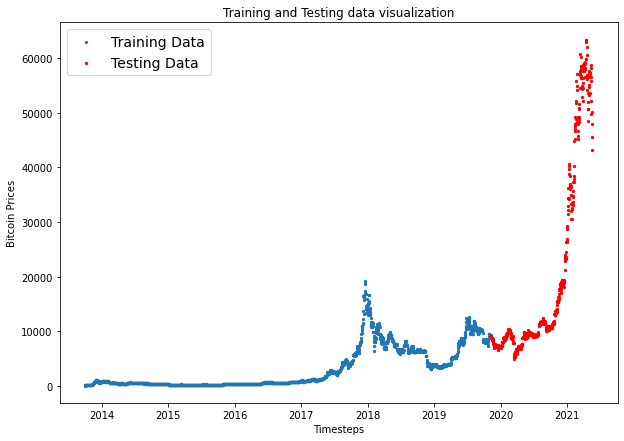

In [12]:
#visualizing training and test data
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5, label = "Training Data")
plt.scatter(x_test,y_test, s = 5, label = "Testing Data", c = "red")
plt.xlabel("Timesteps")
plt.ylabel("Bitcoin Prices")
plt.title("Training and Testing data visualization")
plt.legend(fontsize = 14)
plt.show()

In [13]:
from matplotlib import markers
def plot_time_series(timesteps, values, start = 0, end = None, label = None, format = "."):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  #plt.figure(figsize = size_fig)
  plt.plot(timesteps[start:end], values[start:end],format , label = label)
  plt.xlabel("Timesteps")
  plt.ylabel("Bitcoin Prices")
  if label:
    plt.legend(fontsize = 14)

  plt.grid(True)

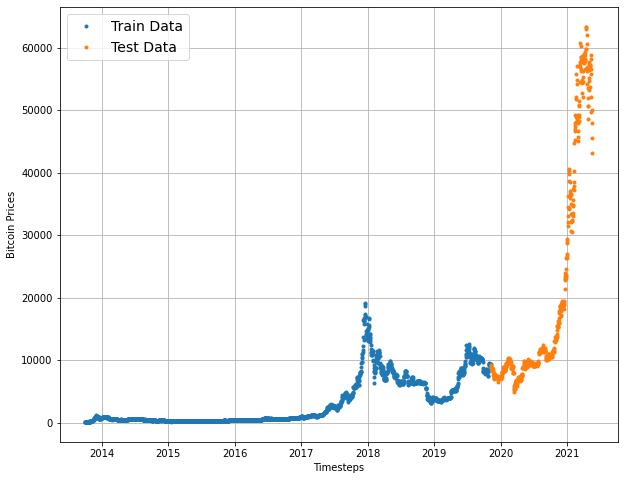

In [14]:
plt.figure(figsize =(10,8))
plot_time_series(x_train,y_train,label = "Train Data")
plot_time_series(x_test,y_test, label = "Test Data")

##### Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

* horizon = number of timesteps to predict into future
* window = number of timesteps from past used to predict horizon


* For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

# Model 0: Naïve forecast (baseline)

- As usual, let's start with a baseline.

- One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

- That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

- The formula looks like this:
                The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).



In [15]:
naive_forecast = y_test[:-1]#All the test values except last values
naive_forecast[:10], naive_forecast[-10:]#first 10 values and last ten values

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

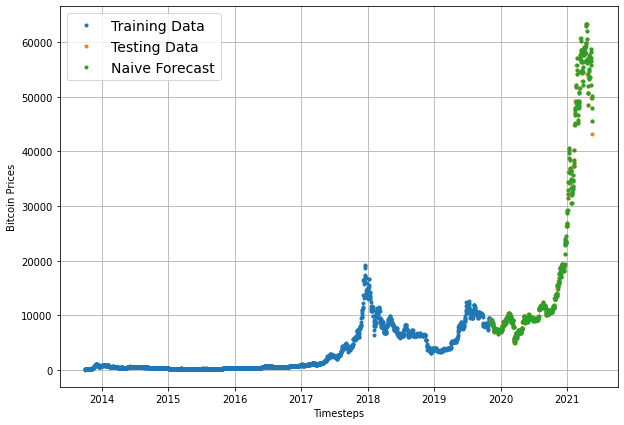

In [16]:
plt.figure(figsize = (10,7))
plot_time_series(x_train,y_train, label = "Training Data")
plot_time_series(x_test,y_test, label = "Testing Data")
plot_time_series(x_test[1:],naive_forecast, label = "Naive Forecast")

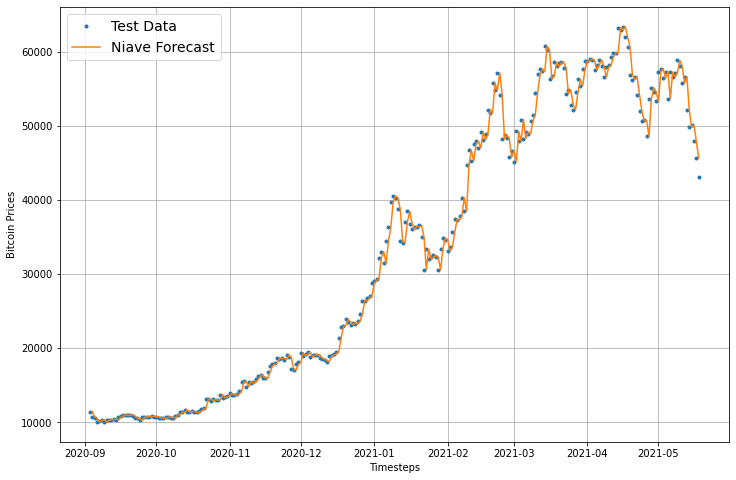

In [20]:
#Zooming to take a better look
plt.figure(figsize = (12,8))
offset = 300
plot_time_series(timesteps = x_test,values = y_test, start = offset, label = "Test Data")
plot_time_series(timesteps = x_test[1:], values = naive_forecast, format = "-", start = offset, label = "Niave Forecast")